### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
def facturacion(f):
  ingreso_total = f['Precio'].sum()
  return ingreso_total

In [8]:
print(f'El ingreso total de la tienda es: ${facturacion(tienda):,.2f}')
print('\n')
print(f'El ingreso total de la tienda 2 es: ${facturacion(tienda2):,.2f}')
print('\n')
print(f'El ingreso total de la tienda 3 es: ${facturacion(tienda3):,.2f}')
print('\n')
print(f'El ingreso total de la tienda 4 es: ${facturacion(tienda4):,.2f}')
print('\n')

El ingreso total de la tienda es: $1,150,880,400.00


El ingreso total de la tienda 2 es: $1,116,343,500.00


El ingreso total de la tienda 3 es: $1,098,019,600.00


El ingreso total de la tienda 4 es: $1,038,375,700.00




# 2. Ventas por categoría

In [43]:
def listar_categoria(lc):
  categorias = []
  for categoria in lc['Categoría del Producto']:
    if categoria not in categorias:
      categorias.append(categoria)

  return categorias


def total_categoria(tc):
  categorias = listar_categoria(tc)
  conteo = {}

  for cat in categorias:
    contador = 0
    for i in range(len(tc)):
      if tc['Categoría del Producto'][i] == cat:
        contador += 1
    conteo[cat] = contador

  return conteo


def popular_categoria(pc):
  categorias_conteo = total_categoria(pc)
  max_cantidad = -1
  categoria_popular = None

  for cat, cantidad in categorias_conteo.items():
    if cantidad > max_cantidad:
      max_cantidad = cantidad
      categoria_popular = cat

  return categoria_popular

In [46]:
print('Tienda categorías: ', listar_categoria(tienda))
print('Tienda Total Categorías: ', total_categoria(tienda))
print('Tienda Categoría Popular: ', popular_categoria(tienda))
print('\n')
print('Tienda categorías: ', listar_categoria(tienda2))
print('Tienda Total Categorías: ', total_categoria(tienda2))
print('Tienda Categoría Popular: ', popular_categoria(tienda2))
print('\n')
print('Tienda categorías: ', listar_categoria(tienda3))
print('Tienda Total Categorías: ', total_categoria(tienda3))
print('Tienda Categoría Popular: ', popular_categoria(tienda3))
print('\n')
print('Tienda categorías: ', listar_categoria(tienda4))
print('Tienda Total Categorías: ', total_categoria(tienda4))
print('Tienda Categoría Popular: ', popular_categoria(tienda4))
print('\n')

Tienda categorías:  ['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos', 'Artículos para el hogar', 'Deportes y diversión', 'Libros', 'Instrumentos musicales']
Tienda Total Categorías:  {'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}
Tienda Categoría Popular:  Muebles


Tienda categorías:  ['Muebles', 'Instrumentos musicales', 'Deportes y diversión', 'Electrónicos', 'Artículos para el hogar', 'Juguetes', 'Electrodomésticos', 'Libros']
Tienda Total Categorías:  {'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}
Tienda Categoría Popular:  Muebles


Tienda categorías:  ['Electrodomésticos', 'Muebles', 'Instrumentos musicales', 'Deportes y diversión', 'Electrónicos', 'Juguetes', 'Artículos para el hogar', 'Lib

# 3. Calificación promedio de la tienda


In [50]:
def total_calificacion(tcf):
  calificacion_total = tcf['Calificación'].sum()
  return calificacion_total


def promedio_calificacion(pcf):
  calificacion_total = total_calificacion(pcf)
  promedio = calificacion_total / len(pcf)
  return round(promedio, 2)

In [53]:
print('Total de puntos de la tienda: ', total_calificacion(tienda))
print('Promedio de calificación de la tienda: ', promedio_calificacion(tienda))
print('\n')
print('Total de puntos de la tienda: ', total_calificacion(tienda2))
print('Promedio de calificación de la tienda: ', promedio_calificacion(tienda2))
print('\n')
print('Total de puntos de la tienda: ', total_calificacion(tienda3))
print('Promedio de calificación de la tienda: ', promedio_calificacion(tienda3))
print('\n')
print('Total de puntos de la tienda: ', total_calificacion(tienda4))
print('Promedio de calificación de la tienda: ', promedio_calificacion(tienda4))
print('\n')

Total de puntos de la tienda:  9381
Promedio de calificación de la tienda:  3.98


Total de puntos de la tienda:  9524
Promedio de calificación de la tienda:  4.04


Total de puntos de la tienda:  9550
Promedio de calificación de la tienda:  4.05


Total de puntos de la tienda:  9422
Promedio de calificación de la tienda:  4.0




# 4. Productos más y menos vendidos

In [55]:
def productos_valorados(pv):
  categorias_valor = total_categoria(pv)
  max_cantidad = -1

  categoria_popular = None

  for cat, cantidad in categorias_valor.items():
    if cantidad > max_cantidad:
        max_cantidad = cantidad
        categoria_popular = cat
  return [categoria_popular, max_cantidad]


def productos_menos_valorados(pmv):
  categorias_valor = total_categoria(pmv)
  min_cantidad = 1000000
  categoria_menos_popular = None

  for cat, cantidad in categorias_valor.items():
    if cantidad < min_cantidad:
        min_cantidad = cantidad
        categoria_menos_popular = cat

  return [categoria_menos_popular, min_cantidad]

In [58]:
print(f'Tienda: Lo mas valorado es {productos_valorados(tienda)} y lo menos valorado es {productos_menos_valorados(tienda)}')
print('\n')
print(f'Tienda 2: Lo mas valorado es {productos_valorados(tienda2)} y lo menos valorado es {productos_menos_valorados(tienda2)}')
print('\n')
print(f'Tienda 3: Lo mas valorado es {productos_valorados(tienda3)} y lo menos valorado es {productos_menos_valorados(tienda3)}')
print('\n')
print(f'Tienda 4: Lo mas valorado es {productos_valorados(tienda4)} y lo menos valorado es {productos_menos_valorados(tienda4)}')
print('\n')

Tienda: Lo mas valorado es ['Muebles', 465] y lo menos valorado es ['Artículos para el hogar', 171]


Tienda 2: Lo mas valorado es ['Muebles', 442] y lo menos valorado es ['Artículos para el hogar', 181]


Tienda 3: Lo mas valorado es ['Muebles', 499] y lo menos valorado es ['Instrumentos musicales', 177]


Tienda 4: Lo mas valorado es ['Muebles', 480] y lo menos valorado es ['Instrumentos musicales', 170]




# 5. Envío promedio por tienda

In [59]:
def total_envio(te):
  envios_total = te['Costo de envío'].sum()
  return envios_total

def promedio_envio(pe):
  envio_total = total_envio(pe)
  promedio_entrega = envio_total / len(pe)
  return round(promedio_entrega, 2)

In [61]:
print('Total de envio de la tienda es: ', total_envio(tienda))
print('Promedio de envio de la tienda es: ', promedio_envio(tienda))
print('\n')
print('Total de envio de la tienda 2 es: ', total_envio(tienda2))
print('Promedio de envio de la tienda 2 es: ', promedio_envio(tienda2))
print('\n')
print('Total de envio de la tienda 3 es: ', total_envio(tienda3))
print('Promedio de envio de la tienda 3 es: ', promedio_envio(tienda3))
print('\n')
print('Total de envio de la tienda 4 es: ', total_envio(tienda4))
print('Promedio de envio de la tienda 4 es: ', promedio_envio(tienda4))
print('\n')

Total de envio de la tienda es:  61377900.0
Promedio de envio de la tienda es:  26018.61


Total de envio de la tienda 2 es:  59485100.0
Promedio de envio de la tienda 2 es:  25216.24


Total de envio de la tienda 3 es:  58516600.0
Promedio de envio de la tienda 3 es:  24805.68


Total de envio de la tienda 4 es:  55317400.0
Promedio de envio de la tienda 4 es:  23459.46




# 6. Representación Gráfica


In [62]:
import matplotlib.pyplot as plt
import numpy as np

## Analisis de facturación

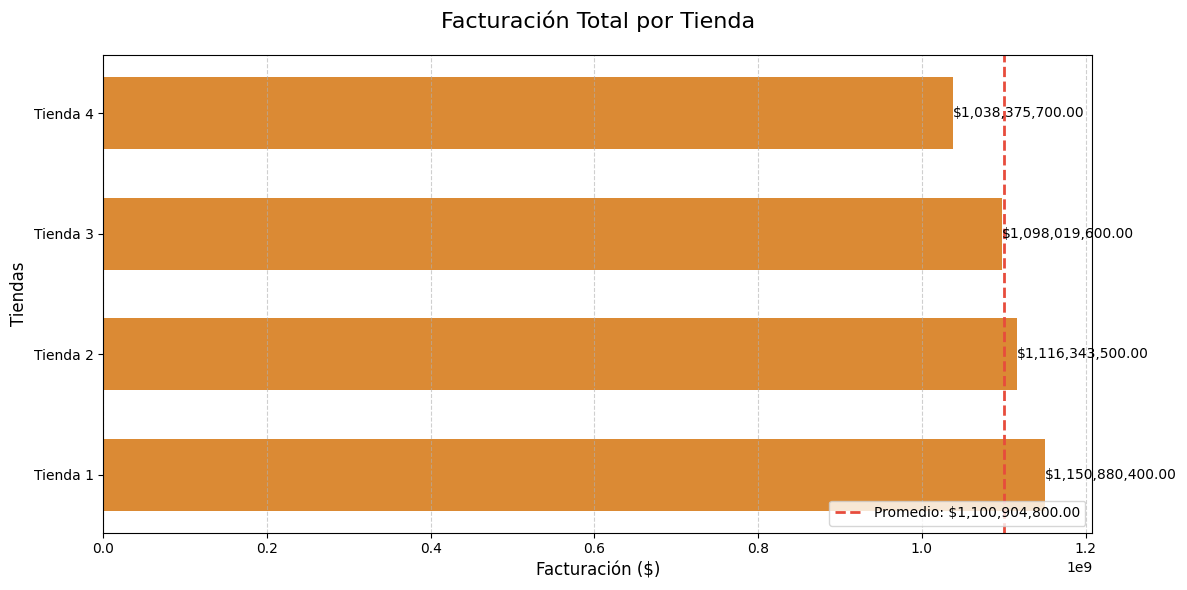

In [68]:
facturacion = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(12, 6))
bars = plt.barh(tiendas, facturacion, color='#db8a34', height=0.6)

promedio = np.mean(facturacion)
plt.axvline(promedio, color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Promedio: ${promedio:,.2f}')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10000, bar.get_y() + bar.get_height()/2,
             f"${width:,.2f}",
             va='center', ha='left', fontsize=10)

plt.title('Facturación Total por Tienda', pad=20, fontsize=16)
plt.xlabel('Facturación ($)', fontsize=12)
plt.ylabel('Tiendas', fontsize=12)
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('facturacion_tiendas.png', dpi=300, bbox_inches='tight')
plt.show()

## Ventas por categoría

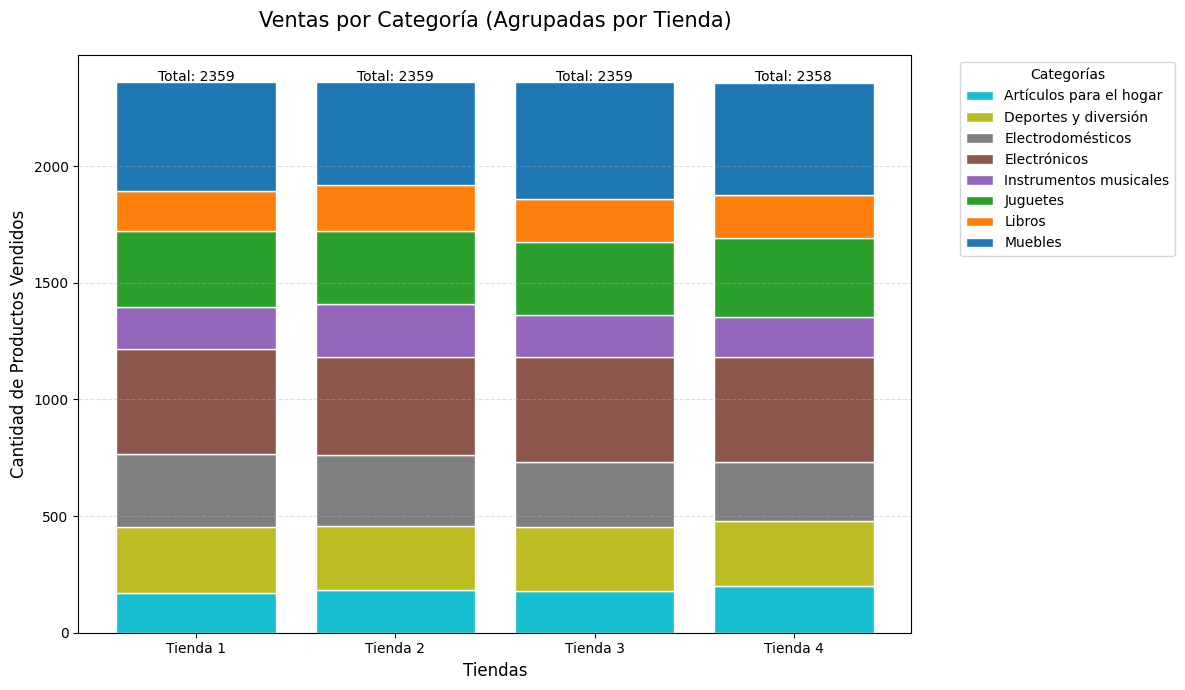

In [73]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

categorias = set()
for df in tiendas:
    categorias.update(total_categoria(df).keys())
categorias = sorted(categorias)

ventas_por_tienda = []
for df in tiendas:
    conteo = total_categoria(df)
    ventas = [conteo.get(cat, 0) for cat in categorias]
    ventas_por_tienda.append(ventas)

plt.figure(figsize=(12, 7))
colores = plt.colormaps['tab10_r'].resampled(len(categorias))

bottom = np.zeros(len(nombres_tiendas))

for i, cat in enumerate(categorias):
    valores = [ventas[i] for ventas in ventas_por_tienda]
    barras = plt.bar(
        nombres_tiendas,
        valores,
        bottom=bottom,
        color=colores(i),
        label=cat,
        edgecolor='white'
    )
    bottom += valores

plt.title('Ventas por Categoría (Agrupadas por Tienda)', pad=20, fontsize=15)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Cantidad de Productos Vendidos', fontsize=12)
plt.legend(title='Categorías', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i, total in enumerate(bottom):
    plt.text(i, total + 5, f"Total: {int(total)}", ha='center')

plt.tight_layout()
plt.show()

## Calificación promedio de la tienda


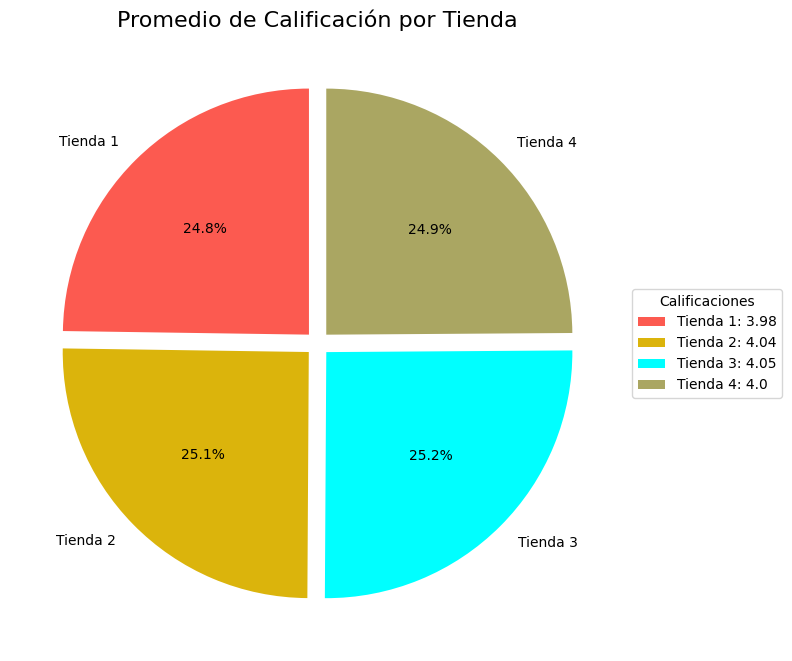

In [80]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

promedios = [promedio_calificacion(tienda) for tienda in tiendas]

colores = ['#fc5a50', '#dbb40c', '#00ffff', '#aaa662']

plt.figure(figsize=(8, 8))
plt.title('Promedio de Calificación por Tienda', fontsize=16)

plt.pie(
    promedios,
    labels=nombres_tiendas,
    colors=colores,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.05, 0.05, 0.05, 0.05)
)

leyenda = [f"{nombre}: {promedio}" for nombre, promedio in zip(nombres_tiendas, promedios)]
plt.legend(leyenda, title="Calificaciones", bbox_to_anchor=(1, 0.5), loc='center left')

plt.tight_layout()
plt.show()

## Productos mas y menos vendidos


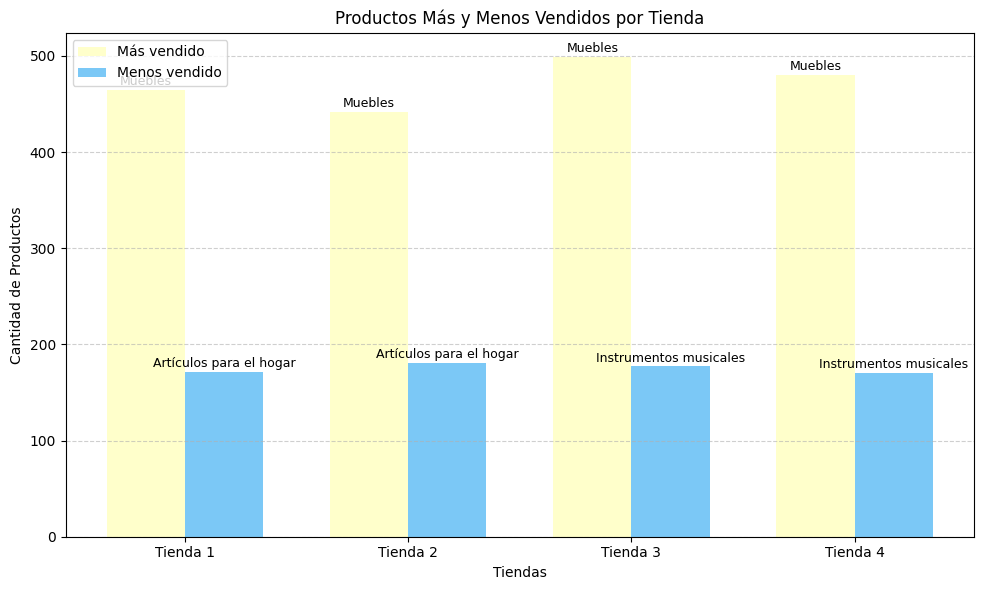

In [83]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

mas_vendidos = [productos_valorados(tienda)[1] for tienda in tiendas]
menos_vendidos = [productos_menos_valorados(tienda)[1] for tienda in tiendas]

categorias_mas = [productos_valorados(tienda)[0] for tienda in tiendas]
categorias_menos = [productos_menos_valorados(tienda)[0] for tienda in tiendas]

plt.figure(figsize=(10, 6))
bar_width = 0.35
indices = np.arange(len(tiendas))

plt.bar(indices, mas_vendidos, width=bar_width, color='#ffffcb', label='Más vendido')
plt.bar(indices + bar_width, menos_vendidos, width=bar_width, color='#7bc8f6', label='Menos vendido')

plt.title('Productos Más y Menos Vendidos por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Cantidad de Productos')
plt.xticks(indices + bar_width/2, nombres_tiendas)

plt.legend()

for i in range(len(tiendas)):
    plt.text(indices[i], mas_vendidos[i] + 5, categorias_mas[i], ha='center', fontsize=9)
    plt.text(indices[i] + bar_width, menos_vendidos[i] + 5, categorias_menos[i], ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()

## Envío promedio por tienda

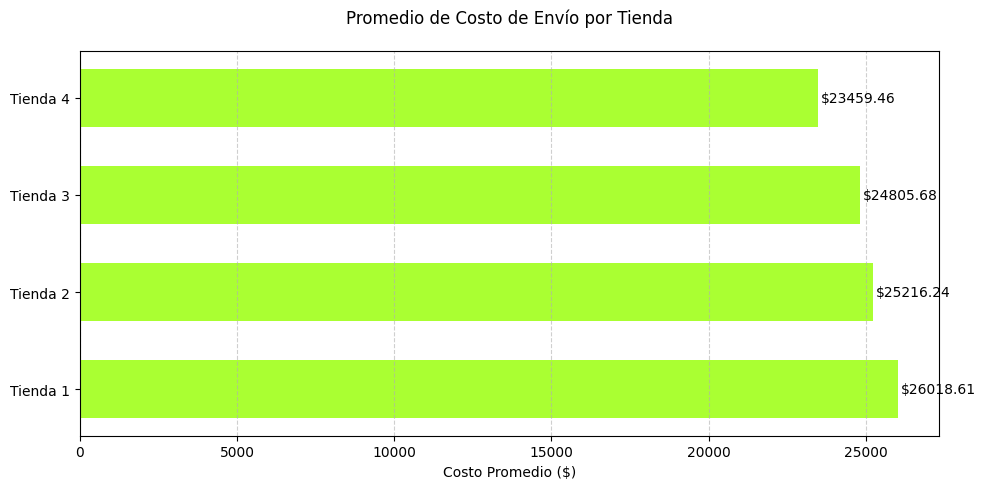

In [84]:
promedios_envio = [promedio_envio(tienda) for tienda in [tienda, tienda2, tienda3, tienda4]]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

plt.figure(figsize=(10, 5))
bars = plt.barh(nombres_tiendas, promedios_envio, color='#AAFF32', height=0.6)

plt.title('Promedio de Costo de Envío por Tienda', pad=20)
plt.xlabel('Costo Promedio ($)')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + 0.3, f"${width:.2f}", va='center')

plt.tight_layout()
plt.show()

# 7.Conclución

#### Tienda recomendada: Tienda 3

### Razones clave:

1. **Alto desempeño en la venta de los muebles** (Es la categoría mas vendida en todas las tiendas.
2. **Calificación mas alta de los clientes** (4.05) lo que nos indica que tendriamos menos riesgo de perdida en la tienda.
3. **Facturación competitiva** tiene ventas cercanas a la Tienda 1, pero con costos de envio menores las de las Tiendas 1 y 2.
4. **Balance general** Vemos que la tienda 4 tiene los costos de envio más bajos,esta descata en ingresos, calificación de los clientes y volumenes en las ventas de la categoria (Muebles).

### Sugerencias:

* Realizar promociones en la categoría de muebles.
* Optimizar los costos de envío para superar a la Tienda 4.
* Observar con mucho cuidado la categoria de Instrumentos musicales ya que es una de sus ventas más bajas, se podria optimizar con promociones o paquetes de compra.






